In [241]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [86]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [350]:
g1 = pd.read_csv('game_1_data.csv',index_col=[0])
g2 = pd.read_csv('game_2_data.csv',index_col=[0])
g3 = pd.read_csv('game_3_data.csv',index_col=[0])
g4 = pd.read_csv('game_4_data.csv',index_col=[0])
g5 = pd.read_csv('game_5_data.csv',index_col=[0])
g6 = pd.read_csv('game_6_data.csv',index_col=[0])
g7 = pd.read_csv('game_7_data.csv',index_col=[0])
g8 = pd.read_csv('game_8_data.csv',index_col=[0])
g9 = pd.read_csv('game_9_data.csv',index_col=[0])
g10 = pd.read_csv('game_10_data.csv',index_col=[0])
games = [g1, g2, g3, g4, g5, g6, g7, g8, g9, g10]
prev_res = pd.read_csv('previous_season_results.csv')
seas_match = pd.read_csv('season_match_up.csv')

In [100]:
#UNIVERSITY YEAR
#get a df of the students and the recorded years to check typos
year = pd.DataFrame()

for x in range(len(games)):
    data = games[x]
    year['game' + str(x + 1)] = data['university year']

#get a list of corrected years based on the most frequent year listed
corrected_year = []

for x in range(len(year)):
    c = Counter(year.loc[x+1])
    y = c.most_common(1)[0][0]
    corrected_year.append(y)

#fix it in all the dfs in games
for x in range(len(games)):
    data = games[x]
    data['university year'] = corrected_year

In [106]:
#EARLY BIRD or NIGHT OWL - these are CORRECT

In [123]:
#percent training sessions attended - are these over 100? NO, CORRECT
# per = []
# for x in range(len(games)):
#     data = games[x]
#     per.append(max(data['percent training sessions attended']))
# per

In [124]:
#overall fitness score - are these over 100? NO, CORRECT
# fit = []
# for x in range(len(games)):
#     data = games[x]
#     fit.append(max(data['overall fitness score']))
# fit

In [130]:
#save the corrected dataframes

# g1.to_csv('game_1_data.csv')
# g2.to_csv('game_2_data.csv')
# g3.to_csv('game_3_data.csv')
# g4.to_csv('game_4_data.csv')
# g5.to_csv('game_5_data.csv')
# g6.to_csv('game_6_data.csv')
# g7.to_csv('game_7_data.csv')
# g8.to_csv('game_8_data.csv')
# g9.to_csv('game_9_data.csv')
# g10.to_csv('game_10_data.csv')

In [399]:
#one hot encode in R then load them here
g1 = pd.read_csv('game_1_clean.csv',index_col=[0])
g2 = pd.read_csv('game_2_clean.csv',index_col=[0])
g3 = pd.read_csv('game_3_clean.csv',index_col=[0])
g4 = pd.read_csv('game_4_clean.csv',index_col=[0])
g5 = pd.read_csv('game_5_clean.csv',index_col=[0])
g6 = pd.read_csv('game_6_clean.csv',index_col=[0])
g7 = pd.read_csv('game_7_clean.csv',index_col=[0])
g8 = pd.read_csv('game_8_clean.csv',index_col=[0])
g9 = pd.read_csv('game_9_clean.csv',index_col=[0])
g10 = pd.read_csv('game_10_clean.csv',index_col=[0])
games = [g1, g2, g3, g4, g5, g6, g7, g8, g9, g10]

In [248]:
seas_match = pd.read_csv('season_match_up.csv')

In [55]:
#do regression on all 10 dfs separately and get coeffs for covariates
coeff_list = []
models = []
covariates = []
ys = []

for d in games:
    data = d
    
    X = data.drop(columns=['game.score', 'student.label', 'night owl',
                        'noon', 'table tennis', 'sophomore'])
    if 'east coast' in X:
        X = X.drop(columns = ['east coast'])
    covariates.append(X)
        
    y = data['game.score']
#     print(X.size)
    ys.append(y)
    
    regr = linear_model.LinearRegression()
    regr.fit(X, y)
    models.append(regr)
    
    coef = regr.coef_
#     print(coef)
    coeff_list.append(coef)
    

In [50]:
#save data in a df
coeff_df = pd.DataFrame(coeff_list, columns = X.columns)
round(coeff_df, 2)
coeff_df.to_csv('coefficient matrix.csv')

In [85]:
coeff_df

,percent.training.sessions.attended,overall.fitness.score,X..extra.strategy.sessions.attended,hours.of.sleep.the.night.before.game,X..meals.on.day.prior.to.game,west coast,evening,morning,early bird,baseball,basketball,curling,football,frisbee,gymnastics,martial arts,frosh,junior,senior
0,33.509605,14.422319,1.277245,0.355284,-1.133443,2.773584e+00,5.820618,1.832931,-2.141108,-1.487560,9.267394,-0.200655,-0.023852,8.281412,-4.569728,6.240045,0.502536,-0.271282,3.204150
1,27.098787,22.577559,1.678826,0.387198,-0.962292,1.361750e+00,6.455112,0.635725,-0.709913,0.909380,9.556576,2.791451,1.172925,7.745150,0.668714,7.040100,1.500334,-0.162699,1.688582
2,27.065451,23.629995,1.545138,0.318708,-0.953123,8.064248e-01,6.380550,-1.560261,-2.074793,-1.561894,4.620699,-0.279082,2.508824,5.454677,-1.605888,5.608005,3.063079,0.644946,1.707747
3,27.522929,22.970316,1.482996,0.417307,-0.969317,-2.163530e-01,4.949682,1.366357,-1.581211,0.781436,7.100879,0.302397,2.990453,4.490527,-0.223569,5.090282,-0.120161,-1.136316,0.565403
4,25.326605,22.703421,1.615284,0.342488,-0.500719,1.183839e+00,5.046138,1.597509,-1.568629,-1.123555,5.781916,-1.358349,-2.098298,4.505904,-4.202304,4.723562,-0.101087,0.342155,-0.310839
5,26.817950,22.871253,1.373722,0.312287,-0.952687,1.776357e-15,7.804799,0.813915,-1.728448,-0.655102,4.941100,-0.107942,0.404868,4.946133,-2.183431,5.005933,0.944681,0.503162,0.583983
6,25.295093,22.913418,1.478851,0.246792,-0.479021,-1.776357e-15,5.926344,0.664586,-1.610461,2.159203,5.513219,0.407448,1.608158,8.016403,-0.017066,5.899153,-2.483167,-1.349149,-1.756149
7,27.427429,22.067400,1.518382,0.344167,-0.951724,0.000000e+00,8.387176,2.513373,-2.457974,-2.018703,3.443383,-0.271635,-0.424008,6.995947,-1.115092,4.921149,-0.612949,-0.720639,-0.511593
8,27.180404,21.859859,1.550306,0.255898,-1.078529,1.776357e-15,5.366451,3.131134,-0.897460,-2.399880,5.371499,-0.241952,1.142215,6.378127,-0.978511,5.249598,-0.741367,0.312788,-0.123500
9,27.225158,23.003474,1.474300,0.417694,-1.142042,1.776357e-15,4.562545,-1.197129,-2.323776,0.700697,5.549356,1.059070,0.511958,6.098036,-0.592793,7.394475,-1.968882,-1.016674,-1.410336


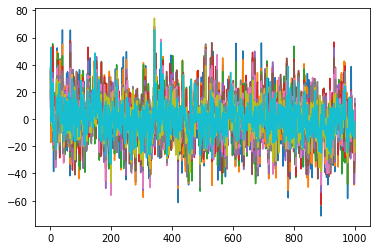

In [84]:
#try regressing residuals against student label
#we don't see label dependent errors, so that is good
for n in range(10):

#     n = 0
    model = models[n]
    resid = y - model.predict(covariates[n])
    plt.plot(np.arange(1, 1001), resid)


In [94]:
#get VIF factors

fac_list = []
for i in range(10):
    n = i
    X = covariates[n]
    v = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    fac_list.append(v)
    
vif = pd.DataFrame(fac_list, columns = X.columns)
vif.to_csv('vif_scores.csv')

In [100]:
vif

,percent.training.sessions.attended,overall.fitness.score,X..extra.strategy.sessions.attended,hours.of.sleep.the.night.before.game,X..meals.on.day.prior.to.game,west coast,evening,morning,early bird,baseball,basketball,curling,football,frisbee,gymnastics,martial arts,frosh,junior,senior
0,17.733013,17.068348,12.718231,6.950120,11.654323,3.437831,3.018219,1.694790,1.218509,1.855063,1.701264,1.914234,1.669601,1.863563,1.577138,1.749754,1.718953,2.238655,2.480056
1,5.052016,5.210106,5.502806,4.798365,8.682982,3.391658,1.379827,1.185305,1.224790,1.749595,1.416186,1.889813,1.627327,1.721371,1.428473,1.622594,1.630438,2.025506,2.003296
2,3.908547,3.667204,4.717747,4.369540,8.328310,3.369485,1.266562,1.092728,1.220848,1.722775,1.383100,1.873254,1.616786,1.665004,1.388295,1.589548,1.599028,1.988089,1.925927
3,3.361450,3.351979,4.335177,4.066357,7.900248,3.371015,1.238735,1.155849,1.223050,1.697793,1.358233,1.881990,1.628693,1.653052,1.373605,1.607401,1.577959,1.965571,1.877755
4,3.094107,3.147459,4.107270,3.945753,7.563615,3.345523,1.212186,1.132235,1.221136,1.687487,1.357208,1.875577,1.623976,1.655844,1.365440,1.625927,1.560010,1.977796,1.859274
5,1.125357,1.173023,1.142573,1.119006,1.218010,24.892915,1.067034,1.056056,1.011022,1.623497,1.433748,1.743557,1.617569,1.628035,1.353361,1.693063,1.332364,1.442705,1.544954
6,1.090367,1.151587,1.100473,1.104620,1.202075,24.918926,1.028080,1.037415,1.010383,1.615756,1.440328,1.746878,1.613873,1.635867,1.357153,1.686010,1.339191,1.430752,1.522171
7,1.073047,1.131306,1.098149,1.109642,1.192610,25.193941,1.044824,1.046879,1.010759,1.621246,1.423599,1.749137,1.607923,1.626496,1.344947,1.675421,1.329469,1.431324,1.517174
8,1.060283,1.099397,1.079243,1.096906,1.179590,25.240671,1.047183,1.049019,1.009208,1.624804,1.417339,1.750531,1.607898,1.621058,1.346197,1.675128,1.327727,1.427150,1.492089
9,1.050385,1.095135,1.068526,1.077143,1.175584,25.290160,1.036626,1.030475,1.009400,1.620877,1.410759,1.762543,1.608348,1.621065,1.347024,1.678989,1.342250,1.441572,1.474140


In [127]:
# try ridge regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
import yellowbrick
from yellowbrick.model_selection import validation_curve 


In [250]:
#try g1:
data = games[0]
X = data.drop(columns=['game.score', 'student.label', 'night owl',
                        'noon', 'table tennis', 'sophomore'])
if 'east coast' in X:
    X = X.drop(columns = ['east coast'])

y = data['game.score']

# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
model = RidgeCV(alphas=np.arange(0.01, 4, 0.01), store_cv_values=True, cv=None, scoring=None) #cv=cv gone

#fit model
model.fit(X, y)

#display lambda that produced the lowest test MSE
print(model.alpha_)

0.79


In [251]:
model1 = Ridge(alpha = model.alpha_)
model1.fit(X, y)

Ridge(alpha=0.79)

In [252]:
model.cv_values_

array([[168.88477936, 168.93792737, 168.99101349, ..., 186.45069171,
        186.48867648, 186.52663797],
       [198.42956151, 198.42244194, 198.41538786, ..., 198.93992322,
        198.94655292, 198.95319889],
       [177.62274043, 177.49704043, 177.3716462 , ..., 144.56614291,
        144.51235241, 144.4586666 ],
       ...,
       [ 32.77119509,  32.79528911,  32.81936044, ...,  41.06857187,
         41.08734648,  41.10611367],
       [ 10.10042429,  10.10539456,  10.11038575, ...,  13.14779622,
         13.15728658,  13.16678277],
       [ 55.73454782,  55.75934386,  55.78404784, ...,  60.36548202,
         60.36785097,  60.37018741]])

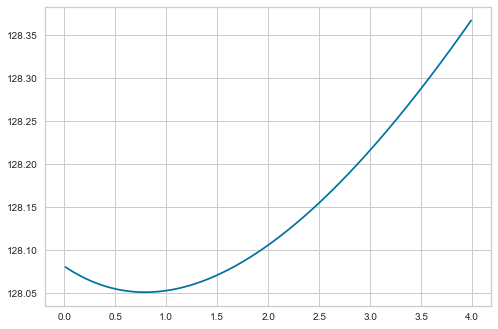

In [253]:
v = np.mean(model.cv_values_, axis=0)

plt.plot(np.arange(0.01, 4, 0.01), v)

In [ ]:
model.cv

In [255]:
data = games[2]

def getX_y(data):
    X = data.drop(columns=['game.score', 'student.label', 'night owl',
                            'noon', 'table tennis', 'sophomore'])
    if 'east coast' in X:
        X = X.drop(columns = ['east coast'])

    y = data['game.score']
    
    return X, y

# y_pred = model.predict(X_test)

In [242]:
mean_squared_error(y_test,y_pred)

129.2994341244267

In [274]:
#testing something here
#train on g0, test on others
# data = games[0]
# X = getX_y(data)[0]
# y = getX_y(data)[1]

# mse_sums = []

# for x in np.arange(0.01, 4, 0.01):
    
#     #define model
#     model = Ridge(alpha = x)

#     #fit model
#     model.fit(X, y)
#     lamb_err = []
    
#     for y in range(9):
#         data = games[y+1]
#         X = getX_y(data)[0]
#         y = getX_y(data)[1]
#         y_pred = model.predict(X)
#         lamb_err.append(mean_squared_error(y ,y_pred))
        
#     mse_sums.append(np.mean(lamb_err))

In [2]:
# testing something
plt.plot(np.arange(0.01, 4, 0.01), mse_sums)

In [290]:
# construct the matrix to predict on
# get averages of the continuous columns across games
t = []
for g in games:
    t.append(list(g['percent.training.sessions.attended']))
    
training = np.mean(t, axis = 0)

f = []
for g in games:
    f.append(list(g['overall.fitness.score']))
    
fitness = np.mean(f, axis = 0)

sc = []
for g in games:
    sc.append(list(g['game.score']))
    
score = np.mean(sc, axis = 0)

st = []
for g in games:
    st.append(list(g['X..extra.strategy.sessions.attended']))
    
strategy = np.mean(st, axis = 0)

sl = []
for g in games:
    sl.append(list(g['hours.of.sleep.the.night.before.game']))
    
sleep = np.mean(sl, axis = 0)

m = []
for g in games:
    m.append(list(g['X..meals.on.day.prior.to.game']))
    
meals = np.mean(m, axis = 0)

In [314]:
# X_matrix = pd.DataFrame()
# X_matrix['game.score'] = score
# X_matrix['percent.training.sessions.attended'] = training
# X_matrix['overall.fitness.score'] = fitness
# X_matrix['X..extra.strategy.sessions.attended'] = strategy
# X_matrix['hours.of.sleep.the.night.before.game'] = sleep
# X_matrix['X..meals.on.day.prior.to.game'] = meals

X_matrix.to_csv('X_matrix.csv')

In [315]:
X_matrix = pd.read_csv('X_matrix.csv',index_col=[0])

In [323]:
#for question 2
X_matrix['morning'] = 1/3
X_matrix['noon'] = 1/3
X_matrix['evening'] = 1/3
X_matrix

,game.score,percent.training.sessions.attended,overall.fitness.score,X..extra.strategy.sessions.attended,hours.of.sleep.the.night.before.game,X..meals.on.day.prior.to.game,evening,morning,noon,early bird,...,curling,football,frisbee,gymnastics,martial arts,table tennis,frosh,junior,senior,sophomore
0,37.429,0.801,0.329,6.7,5.6,4,0.333333,0.333333,0.333333,0,...,1,0,0,0,0,0,0,0,0,1
1,32.583,0.930,0.110,5.5,6.2,3,0.333333,0.333333,0.333333,0,...,1,0,0,0,0,0,0,0,1,0
2,23.523,0.436,0.052,2.7,4.2,5,0.333333,0.333333,0.333333,0,...,0,0,0,1,0,0,0,0,0,1
3,24.760,0.258,0.827,2.3,8.4,6,0.333333,0.333333,0.333333,0,...,0,0,0,0,0,0,0,0,0,1
4,67.180,0.932,0.887,8.9,2.0,4,0.333333,0.333333,0.333333,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31.208,0.044,0.810,1.8,9.2,3,0.333333,0.333333,0.333333,0,...,0,0,0,0,1,0,0,0,1,0
996,28.142,0.039,0.808,5.7,5.1,3,0.333333,0.333333,0.333333,0,...,0,0,0,0,1,0,0,0,0,1
997,63.653,0.644,0.913,7.4,9.3,3,0.333333,0.333333,0.333333,0,...,0,0,0,0,0,0,0,0,1,0
998,32.783,0.558,0.113,9.7,11.3,6,0.333333,0.333333,0.333333,0,...,0,0,0,0,0,1,1,0,0,0


In [327]:
from sklearn.linear_model import Ridge
import numpy as np

alphas = np.arange(0.01, 1, 0.01)
errors_per_alpha = [] * len(alphas)

for i in range(len(games)):
    data = games[i]
    X = data.drop(columns=['game.score', 'student.label', 'night owl',
                            'noon', 'table tennis', 'sophomore'])
    if 'east coast' in X:
        X = X.drop(columns = ['east coast'])

    y = data['game.score']

    for ind, alpha in enumerate(alphas):
        clf = Ridge(alpha=alpha)
        clf.fit(X, y)

        for j in range(len(games)):
            if i != j:
                data = games[j]
                X = data.drop(columns=['game.score', 'student.label', 'night owl',
                                        'noon', 'table tennis', 'sophomore'])
                if 'east coast' in X:
                    X = X.drop(columns = ['east coast'])
                y = data['game.score']

                preds = clf.predict(X)
                error = mean_squared_error(y, preds)



In [427]:
# https://stackoverflow.com/questions/40072870/statistical-summary-table-in-sklearn-linear-model-ridge
from statsmodels.tools.tools import pinv_extended
import statsmodels.api as sm
import sklearn, statsmodels

def regression_analysis(X, y, model):
    
    is_statsmodels = False
    is_sklearn = False
    
    # check for accepted linear models
    if type(model) in [sklearn.linear_model._base.LinearRegression,
                       sklearn.linear_model._ridge.Ridge,
                       sklearn.linear_model._ridge.RidgeCV,
                       sklearn.linear_model._coordinate_descent.Lasso,
                       sklearn.linear_model._coordinate_descent.LassoCV,
                       sklearn.linear_model._coordinate_descent.ElasticNet,
                       sklearn.linear_model._coordinate_descent.ElasticNetCV,
                      ]:
        is_sklearn = True
    elif type(model) in [statsmodels.regression.linear_model.OLS, 
                         statsmodels.base.elastic_net.RegularizedResults,
                        ]:
        is_statsmodels = True
    else:
        print("Only linear models are supported!")
        return None
    
    
    
    has_intercept = False
    
    if is_statsmodels and all(np.array(X)[:,0]==1):
        # statsmodels add_constant has been used already
        has_intercept = True  
    elif is_sklearn and model.intercept_:
        has_intercept = True
        

    
    if is_statsmodels:
        # add_constant has been used already
        x = X
        model_params = model.params
    else: # sklearn model
        if has_intercept:
            x = sm.add_constant(X)
            model_params = np.hstack([np.array([model.intercept_]), model.coef_])
        else:
            x = X
            model_params = model.coef_
        
    #y = np.array(y).ravel()
    
    # define the OLS model
    olsModel = sm.OLS(y, x)
    
    pinv_wexog,_ = pinv_extended(x)
    normalized_cov_params = np.dot(pinv_wexog, np.transpose(pinv_wexog))
    
    
    return sm.regression.linear_model.OLSResults(olsModel, model_params, normalized_cov_params)

In [439]:
# student_data = pd.read_csv('X_matrix.csv')
data = pd.concat(games)
X = data.drop(columns=['game.score', 'student.label', 'night owl',
                        'noon', 'table tennis', 'sophomore'])
if 'east coast' in X:
    X = X.drop(columns = ['east coast'])
  #standardizing the data  
# X['percent.training.sessions.attended'] = (X['percent.training.sessions.attended'] - 
#                                            X['percent.training.sessions.attended'].mean()
#                                           ) / X['percent.training.sessions.attended'].std()

# X['overall.fitness.score'] = (X['overall.fitness.score'] - 
#                                            X['overall.fitness.score'].mean()
#                                           ) / X['overall.fitness.score'].std()

# X['X..extra.strategy.sessions.attended'] = (X['X..extra.strategy.sessions.attended'] - 
#                                            X['X..extra.strategy.sessions.attended'].mean()
#                                           ) / X['X..extra.strategy.sessions.attended'].std()

# X['hours.of.sleep.the.night.before.game'] = (X['hours.of.sleep.the.night.before.game'] - 
#                                            X['hours.of.sleep.the.night.before.game'].mean()
#                                           ) / X['hours.of.sleep.the.night.before.game'].std()

# X['X..meals.on.day.prior.to.game'] = (X['X..meals.on.day.prior.to.game'] - 
#                                            X['X..meals.on.day.prior.to.game'].mean()
#                                           ) / X['X..meals.on.day.prior.to.game'].std()


y = data['game.score']

clf = Ridge(alpha=2.5)
clf.fit(X, y)

result = regression_analysis(X, y, clf)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             game.score   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     1095.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:55:17   Log-Likelihood:                -38649.
No. Observations:               10000   AIC:                         7.734e+04
Df Residuals:                    9980   BIC:                         7.748e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    2.0847      0.637      3.272      0.001       0.836       3.333
percent.training.sessions.attended      26.8468      0.324     82.822      0.000      26.211      27.482
overall.fitness.score                   22.5736      0.332     67.944      0.000      21.922      23.225
X..extra.strategy.sessions.attended      1.5430      0.042     37.139      0.000       1.462       1.624
hours.of.sleep.the.night.before.game     0.3250      0.033      9.734      0.000       0.260       0.390
X..meals.on.day.prior.to.game           -0.8842      0.094     -9.394      0.000      -1.069      -0.700
west coast                               1.2282      0.334      3.675      0.000       0.573       1.883
evening                                  5.7012      0.285     19.993      0.000       5.142       6.260
morning                                  1.0095      0.393      2.567      0.010       0.239       1.780
early bird                              -1.7386      0.308     -5.639      0.000      -2.343      -1.134
baseball                                -0.4025      0.437     -0.921      0.357      -1.259       0.454
basketball                               5.8739      0.522     11.256      0.000       4.851       6.897
curling                                  0.1901      0.407      0.467      0.640      -0.607       0.987
football                                 0.7861      0.438      1.796      0.072      -0.072       1.644
frisbee                                  6.1540      0.441     13.947      0.000       5.289       7.019
gymnastics                              -1.3100      0.546     -2.398      0.017      -2.381      -0.239
martial arts                             5.6672      0.425     13.323      0.000       4.833       6.501
frosh                                    0.0534      0.366      0.146      0.884      -0.664       0.771
junior                                  -0.3228      0.298     -1.084      0.278      -0.906       0.261
senior                                   0.2834      0.354      0.801      0.423      -0.410       0.977
==============================================================================
Omnibus:                     2078.145   Durbin-Watson:                   1.510
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11245.190
Skew:                           0.893   Prob(JB):                         0.00
Kurtosis:                       7.878   Cond. No.                         77.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [440]:
student_data = pd.read_csv('X_matrix.csv')
X = student_data.drop(columns=['game.score', 'student.label', 'night owl',
                        'noon', 'table tennis', 'sophomore'])
if 'east coast' in X:
    X = X.drop(columns = ['east coast'])
    #standardizing the data  
# X['percent.training.sessions.attended'] = (X['percent.training.sessions.attended'] - 
#                                            X['percent.training.sessions.attended'].mean()
#                                           ) / X['percent.training.sessions.attended'].std()

# X['overall.fitness.score'] = (X['overall.fitness.score'] - 
#                                            X['overall.fitness.score'].mean()
#                                           ) / X['overall.fitness.score'].std()

# X['X..extra.strategy.sessions.attended'] = (X['X..extra.strategy.sessions.attended'] - 
#                                            X['X..extra.strategy.sessions.attended'].mean()
#                                           ) / X['X..extra.strategy.sessions.attended'].std()

# X['hours.of.sleep.the.night.before.game'] = (X['hours.of.sleep.the.night.before.game'] - 
#                                            X['hours.of.sleep.the.night.before.game'].mean()
#                                           ) / X['hours.of.sleep.the.night.before.game'].std()

# X['X..meals.on.day.prior.to.game'] = (X['X..meals.on.day.prior.to.game'] - 
#                                            X['X..meals.on.day.prior.to.game'].mean()
#                                           ) / X['X..meals.on.day.prior.to.game'].std()

# regular

X.loc[:,'west coast'] = 0.5
X.loc[:,'evening'] = 0.333333
X.loc[:,'morning'] = 0.333333

preds = clf.predict(X)

no_coast = np.argsort(preds)[-20:]
no_coast_scores = preds[no_coast]
for player in no_coast:
    print(f'player: {player+1}, score: {preds[player]}')

player: 410, score: 64.99620870528861
player: 361, score: 65.02941129163337
player: 888, score: 65.03638929160269
player: 464, score: 65.14202394084309
player: 235, score: 65.36818057921036
player: 268, score: 66.05561216008064
player: 864, score: 66.15128821135153
player: 5, score: 66.16993508042603
player: 760, score: 66.54187535635572
player: 735, score: 66.89718454467436
player: 138, score: 66.9493891253004
player: 129, score: 67.82532438188838
player: 971, score: 67.95338485686702
player: 461, score: 68.16587447906278
player: 359, score: 68.2647827073057
player: 202, score: 68.3850814848536
player: 791, score: 69.26000764194887
player: 340, score: 69.51291651206373
player: 521, score: 69.65026543336245
player: 660, score: 69.73597724572647


In [374]:
no_coast = np.argsort(preds)[-10:]
no_coast_scores = preds[no_coast]
score_sum = 0
for player in no_coast:
    score_sum += preds[player]

In [376]:
score_sum/10

68.57030038683793

In [378]:
student_data = pd.read_csv('X_matrix.csv')
X = student_data.drop(columns=['game.score', 'student.label', 'night owl',
                        'noon', 'table tennis', 'sophomore'])
if 'east coast' in X:
    X = X.drop(columns = ['east coast'])

# Games in the West-Coast-Cup are exclusively scheduled for morning slots, while East-Coast-Cup games happen during evenings

X.loc[:,'west coast'] = 1
X.loc[:,'evening'] = 0
X.loc[:,'morning'] = 1

preds = clf.predict(X)
preds = np.delete(preds, no_coast)
west_coast = np.argsort(preds)[-20:]
west_coast_scores = preds[west_coast]
for player in west_coast:
    print(f'player: {player+1}, score: {preds[player]}')

player: 233, score: 63.52197801556923
player: 434, score: 63.788774245488746
player: 601, score: 63.838197579159306
player: 782, score: 63.867044678182374
player: 25, score: 64.00023868489369
player: 736, score: 64.02846253639156
player: 195, score: 64.09191229650116
player: 517, score: 64.15285116237266
player: 261, score: 64.29444526024913
player: 375, score: 64.32833173671119
player: 405, score: 64.38289712810025
player: 356, score: 64.41609971444501
player: 879, score: 64.42307771441433
player: 458, score: 64.52871236365473
player: 232, score: 64.75486900202202
player: 265, score: 65.4423005828923
player: 855, score: 65.53797663416319
player: 5, score: 65.5566235032377
player: 752, score: 65.92856377916738
player: 727, score: 66.28387296748602


In [ ]:
# west coast players = 727, 752, 5, 855, 265, 232, 458, 879, 356, 405

In [379]:
student_data = pd.read_csv('X_matrix.csv')
X = student_data.drop(columns=['game.score', 'student.label', 'night owl',
                        'noon', 'table tennis', 'sophomore'])
if 'east coast' in X:
    X = X.drop(columns = ['east coast'])

# Games in the West-Coast-Cup are exclusively scheduled for morning slots, while East-Coast-Cup games happen during evenings

X.loc[:,'west coast'] = 0
X.loc[:,'evening'] = 1
X.loc[:,'morning'] = 0

preds = clf.predict(X)
preds = np.delete(preds, no_coast)

east_coast = np.argsort(preds)[-20:]
east_coast_scores = preds[east_coast]
for player in east_coast:
    print(f'player: {player+1}, score: {preds[player]}')

player: 233, score: 66.98549300816094
player: 434, score: 67.25228923808046
player: 601, score: 67.30171257175104
player: 782, score: 67.33055967077408
player: 25, score: 67.46375367748541
player: 736, score: 67.49197752898328
player: 195, score: 67.55542728909288
player: 517, score: 67.61636615496437
player: 261, score: 67.75796025284083
player: 375, score: 67.7918467293029
player: 405, score: 67.84641212069198
player: 356, score: 67.87961470703672
player: 879, score: 67.88659270700606
player: 458, score: 67.99222735624645
player: 232, score: 68.21838399461373
player: 265, score: 68.90581557548401
player: 855, score: 69.0014916267549
player: 5, score: 69.0201384958294
player: 752, score: 69.39207877175909
player: 727, score: 69.74738796007773


In [348]:
score_sum/10

68.57030038683793

In [422]:
no_coast

array([137, 128, 970, 460, 358, 201, 790, 339, 520, 659], dtype=int64)

In [385]:
meals = X_matrix['X..meals.on.day.prior.to.game']
score = X_matrix['game.score']

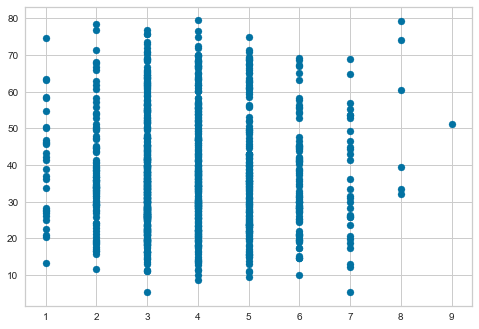

In [387]:
plt.scatter(meals, score)

In [394]:
# model = np.poly1d(np.polyfit(meals, score, 2))

# #add fitted polynomial line to scatterplot
# polyline = np.linspace(1, 10, 1)
# plt.scatter(meals, score)
# plt.plot(polyline, model(polyline))
# plt.show()

In [ ]:
max_expected_roster = [660, 521, 340, 791, 202, 359, 461, 971, 129, 138]

In [ ]:
#optimize for regular season
#get variance for estimates?
#take score of winniing team, see where it falls in the distribution
#find probability mass below winnign teams score, which is probability of losing

In [ ]:
# build roster that minimises the chances of losing a single game, and one that maximises the number of expected wins.
#1. = max prob of winning all games products of p(i), 2. max summ of p(i)

In [ ]:
#roster 1: how to calculate probabilities of winning a game

In [403]:
seas_match

,team label,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,team score,100.0,85.01,71.42,69.72,77.58,53.77,91.59,65.98,56.96,...,49.4,63.47,72.23,89.98,63.24,67.76,93.09,64.17,91.04,74.61


In [418]:
from sklearn.linear_model import LogisticRegression

data = prev_res.drop(columns = ['game label'])
X = data.drop(columns = ['winning team'])
y = data['winning team']

log_model = LogisticRegression(random_state=0).fit(X, y)
#predicts the [0,1]
log_model.predict(X)
#get the probabilities for the result being [0, 1]
log_model.predict_proba(X)
#get the score, which is 0.82
log_model.score(X, y)

0.82

In [4]:
other_teams = list(seas_match.loc[0])[1:]

#train model and get expected player scores
student_data = pd.read_csv('X_matrix.csv')
X = student_data.drop(columns=['game.score', 'student.label', 'night owl',
                        'noon', 'table tennis', 'sophomore'])
if 'east coast' in X:
    X = X.drop(columns = ['east coast'])
    
# regular

X.loc[:,'west coast'] = 0.5
X.loc[:,'evening'] = 0.333333
X.loc[:,'morning'] = 0.333333

preds = clf.predict(X)

no_coast = np.argsort(preds)[-20:]
no_coast_scores = preds[no_coast]
for player in no_coast:
    print(f'player: {player+1}, score: {preds[player]}')

players = np.argsort(preds)

#define a player, and then get the expected score for it
expected_prob = []
for player in players:
    score = preds[player]

    #create a df to feed into the model
    roster_score = pd.DataFrame()
    roster_score['team 1 score'] = 0
    roster_score['team 2 score'] = other_teams
    roster_score['team 1 score'] = score

    #[0,1] whether our team will win
    winning_team = log_model.predict(roster_score)
    #probabilities that our roster will win
    winning_team_proba = log_model.predict_proba(roster_score)[:,1] # want to max this
    expected_prob.append(np.product(winning_team_proba))
    
#construct dataframe
expected_df = pd.DataFrame()
expected_df['player'] = players+1
expected_df['expected win'] = expected_prob

expected_df.to_csv('minimize losing a game.csv')

In [485]:
expected_df.tail(15)

,player,expected win
985,268,7.672399e-12
986,864,8.700240e-12
987,5,8.915658e-12
988,760,1.447845e-11
989,735,2.288488e-11
990,138,2.446639e-11
991,129,7.382015e-11
992,971,8.652287e-11
993,461,1.124333e-10
994,359,1.269318e-10


In [481]:
#roster 2
other_teams = list(seas_match.loc[0])[1:]

#define a player, and then get the expected score for it
expected_prob = []
for player in players:
    score = preds[player]

    #create a df to feed into the model
    roster_score = pd.DataFrame()
    roster_score['team 1 score'] = 0
    roster_score['team 2 score'] = other_teams
    roster_score['team 1 score'] = score

    #[0,1] whether our team will win
    winning_team = log_model.predict(roster_score)
    #probabilities that our roster will win
    winning_team_proba = log_model.predict_proba(roster_score)[:,1] # want to max this
    expected_prob.append(np.sum(winning_team_proba))
    
#construct dataframe
max_expected_wins = pd.DataFrame()
max_expected_wins['player'] = players+1
max_expected_wins['expected win'] = expected_prob

max_expected_wins.to_csv('maximize expected wins.csv')

In [483]:
max_expected_wins.tail(15)

,player,expected win
985,268,8.025299
986,864,8.061321
987,5,8.068344
988,760,8.208571
989,735,8.342752
990,138,8.362482
991,129,8.693957
992,971,8.742461
993,461,8.822954
994,359,8.860423


In [372]:
other_teams = list(seas_match.loc[0])[1:]

len([x for x in other_teams if  x < 68.5])

9